## Validating the feature filter component

In [1]:
import torch
import numpy as np

from datasets.dataset import transform_dataset, kfold_dataset
from R2Ntab import train as train, R2Ntab
import matplotlib.pyplot as plt

In [2]:
dataset_names = ['adult', 'heloc', 'house', 'magic']
cancel_rates = [1e-3, 1e-4, 1e-5]
runs = 10

data = []
acc_means = []
acc_stds = []
for dataset in dataset_names:
    print(dataset)
    dummy_features = 20

    X, Y, X_headers, Y_headers = transform_dataset(dataset, method='onehot-compare', negations=False, labels='binary', dummy_features=dummy_features)
    datasets = kfold_dataset(X, Y, shuffle=1)
    X_train, X_test, Y_train, Y_test = datasets[0]
    train_set = torch.utils.data.TensorDataset(torch.Tensor(X_train.to_numpy()), torch.Tensor(Y_train))
    test_set = torch.utils.data.TensorDataset(torch.Tensor(X_test.to_numpy()), torch.Tensor(Y_test))
    
    dummy_index = next(i for i, header in enumerate(X_headers) if 'dummy' in header)
    for cancel_rate in cancel_rates:
        print('  ', cancel_rate)
        run_data = []
        accuracies = []
        conditions = []
        for run in range(runs):
            print('    ', run)
            net = R2Ntab(train_set[:][0].size(1), 50, 1)
            dummies, acc = train(net, train_set, test_set=test_set, device='cpu', lr_cancel=5e-3, lr_rules=1e-2, epochs=1000, 
                      batch_size=400, and_lam=1e-2, cancel_lam=cancel_rate, or_lam=1e-5, num_alter=500, dummy_index=dummy_index)
            net.reweight_layer()
            run_data.append(dummies)
            acc = (net.predict(np.array(X_test)) == Y_test).mean()
            accuracies.append(acc)

        run_data = np.array(run_data)
        std = np.std(accuracies)
        accuracies = np.array(accuracies)
        data.append(run_data.mean(axis=0))
        acc_means.append(accuracies.mean(axis=0))
        acc_stds.append(std)

adult
   0.001
     0


2023-06-28 23:42:23.846267: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 23:42:23.880965: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 23:42:23.881486: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 23:42:24.407944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.61it/s, rules cancelled=147, 


     1


Epoch: 100%|██████████| 1000/1000 [04:40<00:00,  3.56it/s, rules cancelled=150, 


     2


Epoch: 100%|██████████| 1000/1000 [04:36<00:00,  3.62it/s, rules cancelled=148, 


     3


Epoch: 100%|██████████| 1000/1000 [04:35<00:00,  3.63it/s, rules cancelled=149, 


     4


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=150, 


     5


Epoch: 100%|██████████| 1000/1000 [04:38<00:00,  3.60it/s, rules cancelled=158, 


     6


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.61it/s, rules cancelled=147, 


     7


Epoch: 100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s, rules cancelled=154, 


     8


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=148, 


     9


Epoch: 100%|██████████| 1000/1000 [04:36<00:00,  3.61it/s, rules cancelled=153, 


   0.0001
     0


Epoch: 100%|██████████| 1000/1000 [04:36<00:00,  3.62it/s, rules cancelled=109, 


     1


Epoch: 100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s, rules cancelled=110, 


     2


Epoch: 100%|██████████| 1000/1000 [04:36<00:00,  3.61it/s, rules cancelled=101, 


     3


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=114, 


     4


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.61it/s, rules cancelled=100, 


     5


Epoch: 100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s, rules cancelled=100, 


     6


Epoch: 100%|██████████| 1000/1000 [04:39<00:00,  3.58it/s, rules cancelled=100, 


     7


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=113, 


     8


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=107, 


     9


Epoch: 100%|██████████| 1000/1000 [04:39<00:00,  3.58it/s, rules cancelled=115, 


   1e-05
     0


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=83, l


     1


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.61it/s, rules cancelled=90, l


     2


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=99, l


     3


Epoch: 100%|██████████| 1000/1000 [04:39<00:00,  3.58it/s, rules cancelled=80, l


     4


Epoch: 100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s, rules cancelled=92, l


     5


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=96, l


     6


Epoch: 100%|██████████| 1000/1000 [04:38<00:00,  3.60it/s, rules cancelled=94, l


     7


Epoch: 100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s, rules cancelled=79, l


     8


Epoch: 100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s, rules cancelled=99, l


     9


Epoch: 100%|██████████| 1000/1000 [04:36<00:00,  3.62it/s, rules cancelled=89, l


heloc
   0.001
     0


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.38it/s, rules cancelled=80, l


     1


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.35it/s, rules cancelled=84, l


     2


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.33it/s, rules cancelled=83, l


     3


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.31it/s, rules cancelled=82, l


     4


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.31it/s, rules cancelled=83, l


     5


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.40it/s, rules cancelled=81, l


     6


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.33it/s, rules cancelled=78, l


     7


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.23it/s, rules cancelled=83, l


     8


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.32it/s, rules cancelled=84, l


     9


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s, rules cancelled=79, l


   0.0001
     0


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.30it/s, rules cancelled=75, l


     1


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s, rules cancelled=79, l


     2


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.40it/s, rules cancelled=74, l


     3


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.31it/s, rules cancelled=74, l


     4


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.24it/s, rules cancelled=81, l


     5


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.29it/s, rules cancelled=79, l


     6


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s, rules cancelled=79, l


     7


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.36it/s, rules cancelled=84, l


     8


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.38it/s, rules cancelled=79, l


     9


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.29it/s, rules cancelled=80, l


   1e-05
     0


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.24it/s, rules cancelled=77, l


     1


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.32it/s, rules cancelled=78, l


     2


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.24it/s, rules cancelled=84, l


     3


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.35it/s, rules cancelled=77, l


     4


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.27it/s, rules cancelled=72, l


     5


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.40it/s, rules cancelled=78, l


     6


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.42it/s, rules cancelled=70, l


     7


Epoch: 100%|██████████| 1000/1000 [01:37<00:00, 10.31it/s, rules cancelled=77, l


     8


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.32it/s, rules cancelled=80, l


     9


Epoch: 100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s, rules cancelled=78, l


house
   0.001
     0


Epoch: 100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s, rules cancelled=107, 


     1


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s, rules cancelled=111, 


     2


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s, rules cancelled=111, 


     3


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.88it/s, rules cancelled=119, 


     4


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.88it/s, rules cancelled=110, 


     5


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s, rules cancelled=111, 


     6


Epoch: 100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s, rules cancelled=109, 


     7


Epoch: 100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s, rules cancelled=113, 


     8


Epoch: 100%|██████████| 1000/1000 [03:22<00:00,  4.93it/s, rules cancelled=109, 


     9


Epoch: 100%|██████████| 1000/1000 [03:22<00:00,  4.93it/s, rules cancelled=110, 


   0.0001
     0


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s, rules cancelled=108, 


     1


Epoch: 100%|██████████| 1000/1000 [03:23<00:00,  4.92it/s, rules cancelled=110, 


     2


Epoch: 100%|██████████| 1000/1000 [03:23<00:00,  4.90it/s, rules cancelled=114, 


     3


Epoch: 100%|██████████| 1000/1000 [03:25<00:00,  4.87it/s, rules cancelled=106, 


     4


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s, rules cancelled=106, 


     5


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s, rules cancelled=114, 


     6


Epoch: 100%|██████████| 1000/1000 [03:22<00:00,  4.94it/s, rules cancelled=110, 


     7


Epoch: 100%|██████████| 1000/1000 [03:25<00:00,  4.88it/s, rules cancelled=111, 


     8


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s, rules cancelled=111, 


     9


Epoch: 100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s, rules cancelled=111, 


   1e-05
     0


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s, rules cancelled=109, 


     1


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s, rules cancelled=110, 


     2


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s, rules cancelled=112, 


     3


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s, rules cancelled=113, 


     4


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s, rules cancelled=106, 


     5


Epoch: 100%|██████████| 1000/1000 [03:23<00:00,  4.90it/s, rules cancelled=106, 


     6


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s, rules cancelled=111, 


     7


Epoch: 100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s, rules cancelled=107, 


     8


Epoch: 100%|██████████| 1000/1000 [03:25<00:00,  4.87it/s, rules cancelled=108, 


     9


Epoch: 100%|██████████| 1000/1000 [03:24<00:00,  4.88it/s, rules cancelled=111, 


magic
   0.001
     0


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s, rules cancelled=86, l


     1


Epoch: 100%|██████████| 1000/1000 [02:48<00:00,  5.92it/s, rules cancelled=87, l


     2


Epoch: 100%|██████████| 1000/1000 [02:48<00:00,  5.94it/s, rules cancelled=85, l


     3


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s, rules cancelled=94, l


     4


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s, rules cancelled=84, l


     5


Epoch: 100%|██████████| 1000/1000 [02:50<00:00,  5.88it/s, rules cancelled=89, l


     6


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s, rules cancelled=91, l


     7


Epoch: 100%|██████████| 1000/1000 [02:50<00:00,  5.87it/s, rules cancelled=89, l


     8


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s, rules cancelled=88, l


     9


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s, rules cancelled=85, l


   0.0001
     0


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s, rules cancelled=82, l


     1


Epoch: 100%|██████████| 1000/1000 [02:48<00:00,  5.92it/s, rules cancelled=83, l


     2


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s, rules cancelled=82, l


     3


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s, rules cancelled=80, l


     4


Epoch: 100%|██████████| 1000/1000 [02:48<00:00,  5.92it/s, rules cancelled=82, l


     5


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s, rules cancelled=84, l


     6


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s, rules cancelled=82, l


     7


Epoch: 100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s, rules cancelled=86, l


     8


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s, rules cancelled=83, l


     9


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s, rules cancelled=82, l


   1e-05
     0


Epoch: 100%|██████████| 1000/1000 [02:50<00:00,  5.87it/s, rules cancelled=82, l


     1


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.88it/s, rules cancelled=76, l


     2


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s, rules cancelled=81, l


     3


Epoch: 100%|██████████| 1000/1000 [02:48<00:00,  5.93it/s, rules cancelled=82, l


     4


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s, rules cancelled=81, l


     5


Epoch: 100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s, rules cancelled=81, l


     6


Epoch: 100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s, rules cancelled=86, l


     7


Epoch: 100%|██████████| 1000/1000 [02:48<00:00,  5.93it/s, rules cancelled=81, l


     8


Epoch: 100%|██████████| 1000/1000 [02:48<00:00,  5.92it/s, rules cancelled=83, l


     9


Epoch: 100%|██████████| 1000/1000 [02:50<00:00,  5.88it/s, rules cancelled=84, l


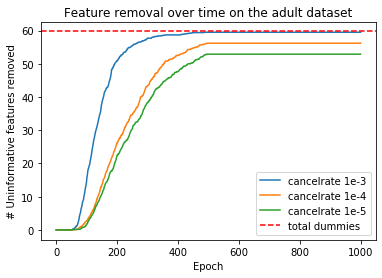

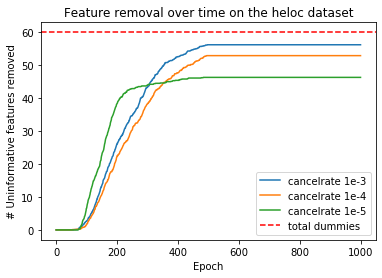

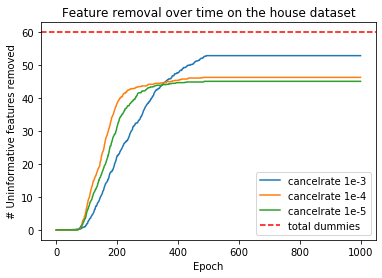

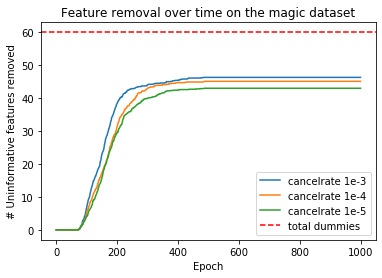

In [3]:
n_dummies = X_train.shape[1]-dummy_index
for index, dataset in enumerate(dataset_names): 
    plt.plot(data[index])
    plt.plot(data[index+1])
    plt.plot(data[index+2])
    plt.axhline(y=n_dummies, color='r', linestyle='dashed', label='total dummies')    
    plt.title(f"Feature removal over time on the {dataset} dataset")
    plt.ylabel("# Uninformative features removed")
    plt.xlabel("Epoch")
    plt.legend(['cancelrate 1e-3', 'cancelrate 1e-4', 'cancelrate 1e-5', 'total dummies'])
    plt.savefig(f'dummy_{dataset}.png')
    plt.show()

In [4]:
print(acc_means)
print(acc_stds)

[0.8198408751864743, 0.822542681916128, 0.8290402784684237, 0.7190248565965582, 0.7135755258126195, 0.7118546845124282, 0.8454465657230635, 0.8402457757296468, 0.8445468509984639, 0.8348054679284964, 0.8410883280757098, 0.83664563617245]
[0.02112013548973823, 0.010138517594823817, 0.005372712978960757, 0.006275618903356134, 0.006640059408866279, 0.007929229173898253, 0.006617604897437754, 0.004350280360236787, 0.008866242088638537, 0.007775419110998343, 0.007595628537066233, 0.015684205751203883]
